# Day 6 Network

Kudos to [this tutorial](https://williamthyer.github.io/posts/2021/4/bike_networks/) on pulling cycle lanes from OSM.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
from matplotlib import font_manager
import warnings
warnings.filterwarnings("ignore")

In [113]:
from matplotlib import font_manager
#set fonts
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\\OpenSans-Medium.ttf')
subtitle_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\OpenSans-Bold.ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\OpenSans-ExtraBold.ttf')

In [ ]:
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [2]:
def get_cycleways_place(city_name): 
    
    # Configuring osmnx
    useful_tags = ox.settings.useful_tags_way + ['cycleway']
    ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
    
    # Querying for roads and bike trails
    cycleways = ox.graph_from_place(city_name, network_type='bike', simplify=True)
    
    # Finding all non-cycleways in the network
    non_cycleways = [(u, v, k) for  u, v, k, d  in  cycleways.edges(keys=True, data=True) if  not ('cycleway'  in  d  or  d['highway']=='cycleway')]
   
    # Remove non-cycleways and isolated nodes
    cycleways.remove_edges_from(non_cycleways)
    cycleways = ox.utils_graph.remove_isolated_nodes(cycleways)
    
    return cycleways

In [ ]:
#get data for each of the 10 cities
amsterdam = get_cycleways_place("Amsterdam")
rotterdam = get_cycleways_place("Rotterdam")
utrecht = get_cycleways_place("Utrecht")
hague = get_cycleways_place("The Hague")
eindhoven = get_cycleways_place("Eindhoven")
groningen  = get_cycleways_place("Groningen ")

In [5]:
#get total length of cycle lanes (in meters)
amsterdam_stats = ox.basic_stats(amsterdam)
rotterdam_stats = ox.basic_stats(rotterdam)
utrecht_stats = ox.basic_stats(utrecht)
hague_stats = ox.basic_stats(hague)
eindhoven_stats = ox.basic_stats(eindhoven)
groningen_stats = ox.basic_stats(groningen)

In [30]:
cities = [amsterdam, rotterdam, utrecht, hague, eindhoven, groningen]
cities_names = ["Amsterdam", "Rotterdam", "Utrecht", "Hague", "Eindhoven", "Groningen"]
cities_stats =  [amsterdam_stats, rotterdam_stats, utrecht_stats, hague_stats, eindhoven_stats, groningen_stats]

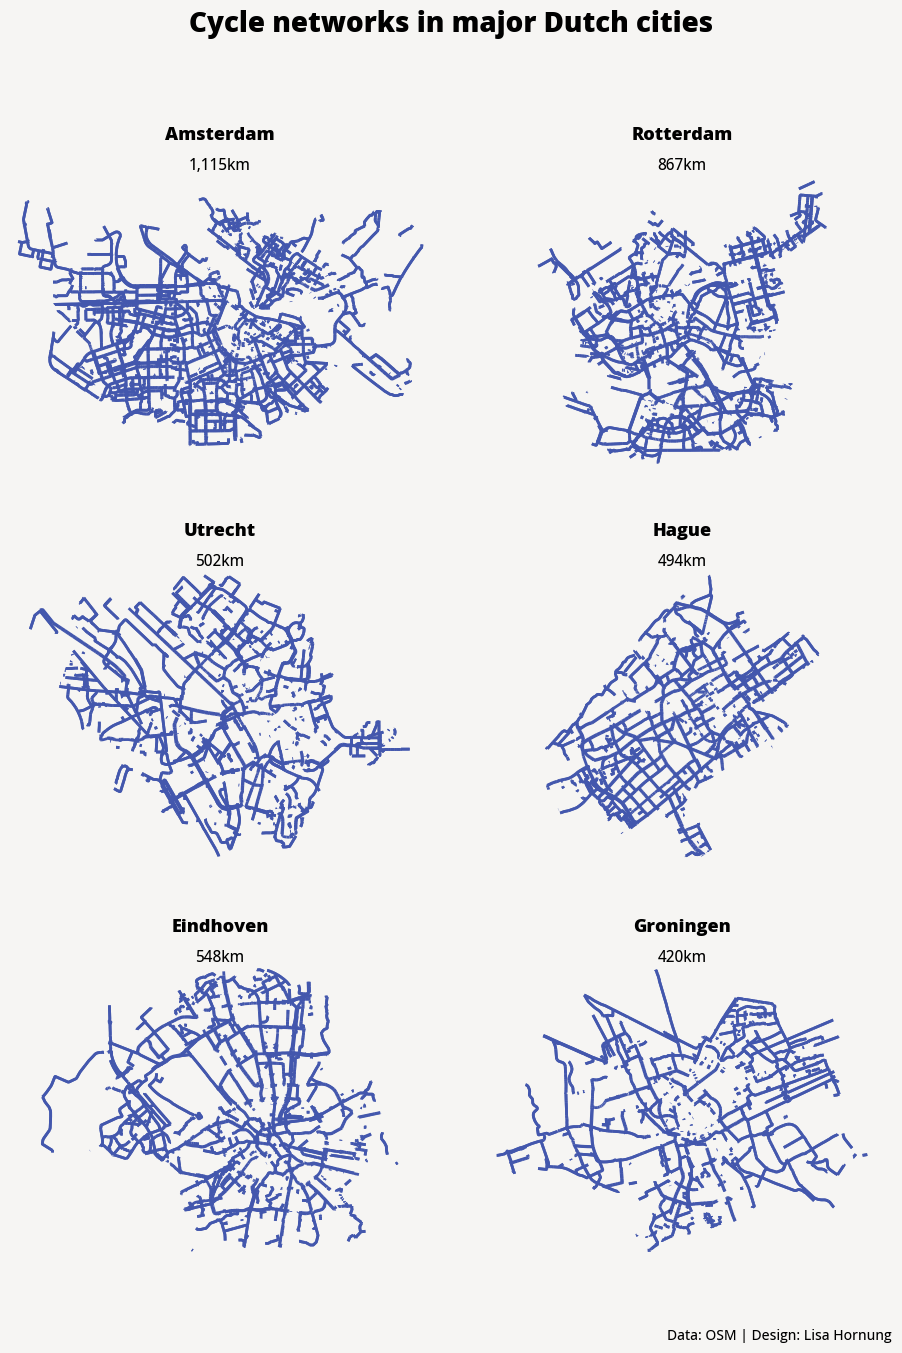

In [119]:
#Plot 
fig, axs = plt.subplots(3,2, figsize=(9, 12))
plt.subplots_adjust(left=0.01, bottom=0.05, right=0.99, top=0.95, wspace=0.1, hspace=0.35)  
cols = { "bg": "#F6F5F3", "lines": "#4357AD"}
fig.set_facecolor(cols["bg"])

for i in range(len(cities)): 
    ax =  axs.flatten()[i]
    ox.plot_graph(cities[i], ax=ax, node_size=0, edge_color=cols["lines"], edge_linewidth=2, show=False, close=False)
    pos = ax.get_position()
    ypos = [0.98, 0.98, 0.65, 0.65, 0.32, 0.32 ]
    plt.figtext(pos.x0+ (pos.x1-pos.x0)/2, ypos[i],  cities_names[i], fontsize=13, ha="center",fontproperties=title_font)
    plt.figtext( pos.x0+ (pos.x1-pos.x0)/2, ypos[i] - 0.025,  '{:,.0f}km'.format(cities_stats[i]["edge_length_total"]/1000),
                fontsize=11, ha="center", fontproperties=label_font)
    ax.set_facecolor(cols["bg"])

plt.figtext(0.5, 1.07,  "Cycle networks in major Dutch cities" , fontsize=20, ha="center",fontproperties=title_font)
plt.figtext(0.99, -0.02,  "Data: OSM | Design: Lisa Hornung" , fontsize=10, ha="right",fontproperties=label_font)

#save
plt.savefig("cycle-networks-netherlands.png", bbox_inches='tight',  transparent=False, pad_inches=0.7)

plt.show()